# Classify Song Genres from Audio Data

# Tasks

## Preparing our Data Set

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [13]:
#importing datasets
tracks = pd.read_csv('fma-rock-vs-hiphop.csv')
echonest = pd.read_json('echonest-metrics.json')

In [14]:
pd.set_option('display.max_columns', None)

In [15]:
tracks.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]","[58, 12, 45]",NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]","[58, 12, 45]",NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],"[25, 12]",NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],"[25, 12]",NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],"[26, 12]",NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [18]:
echonest.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [16]:
tracks.shape

(17734, 21)

In [25]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [26]:
tracks.describe()

,track_id,bit_rate,comments,duration,favorites,interest,listens,number
count,17734.000000,17734.000000,17734.000000,17734.000000,17734.000000,1.773400e+04,17734.000000,17734.000000
mean,69394.145991,258971.413781,0.020695,220.942934,1.685237,1.678238e+03,1079.709541,6.184110
std,45784.589753,61535.621463,0.270070,177.906821,6.629402,9.394969e+03,4693.497635,7.075062
min,2.000000,-1.000000,0.000000,2.000000,0.000000,1.800000e+01,9.000000,0.000000
25%,29979.000000,220982.000000,0.000000,139.000000,0.000000,4.210000e+02,214.000000,2.000000
50%,64193.500000,256000.000000,0.000000,192.000000,1.000000,8.240000e+02,461.000000,5.000000
75%,109442.750000,320000.000000,0.000000,255.000000,2.000000,1.628000e+03,1018.000000,8.000000
max,155319.000000,448000.000000,24.000000,3675.000000,554.000000,1.038669e+06,433992.000000,100.000000


In [17]:
echonest.shape

(13129, 9)

In [27]:
echonest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [28]:
echonest.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,13129.000000,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000
mean,34031.058268,5.246876e-01,0.487290,0.537516,0.640536,0.187804,0.099174,123.080061,0.439761
std,28950.422182,3.837186e-01,0.190148,0.278049,0.361430,0.158051,0.137381,35.015137,0.276028
min,2.000000,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010
25%,12986.000000,1.037726e-01,0.344759,0.321300,0.323466,0.101406,0.036932,95.967000,0.197321
50%,28097.000000,5.739848e-01,0.485635,0.549113,0.838134,0.119002,0.049019,120.057000,0.417743
75%,45021.000000,9.207270e-01,0.629094,0.776254,0.918244,0.211041,0.085452,145.318000,0.665575
max,124911.000000,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990


In [39]:
#Required features made into a dataframe

In [30]:
tracks_df = pd.merge(echonest, tracks[['track_id','genre_top']],on='track_id')

In [31]:
tracks_df.shape

(4802, 10)

In [32]:
tracks_df.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


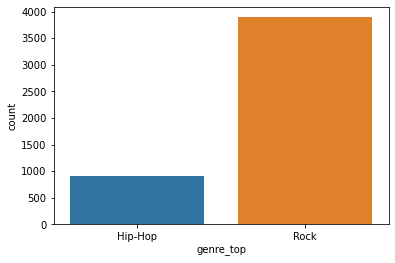

In [50]:
sns.countplot(x=tracks_df['genre_top'])

In [62]:
count_genre = tracks_df['genre_top'].value_counts()
count_genre

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64

In [67]:
print("Ratio of dataset having genre Rock is: {}".format((count_genre['Rock']/tracks_df.shape[0])*100))
print("Ratio of dataset having genre Hip-Hop is: {}".format((count_genre['Hip-Hop']/tracks_df.shape[0])*100))

Ratio of dataset having genre Rock is: 81.04956268221575
Ratio of dataset having genre Hip-Hop is: 18.950437317784257


## Pairwise relationships between continuous variables

                  track_id  acousticness  danceability    energy  \
track_id          1.000000     -0.372282      0.049454  0.140703   
acousticness     -0.372282      1.000000     -0.028954 -0.281619   
danceability      0.049454     -0.028954      1.000000 -0.242032   
energy            0.140703     -0.281619     -0.242032  1.000000   
instrumentalness -0.275623      0.194780     -0.255217  0.028238   
liveness          0.048231     -0.019991     -0.106584  0.113331   
speechiness      -0.026995      0.072204      0.276206 -0.109983   
tempo            -0.025392     -0.026310     -0.242089  0.195227   
valence           0.010070     -0.013841      0.473165  0.038603   

                  instrumentalness  liveness  speechiness     tempo   valence  
track_id                 -0.275623  0.048231    -0.026995 -0.025392  0.010070  
acousticness              0.194780 -0.019991     0.072204 -0.026310 -0.013841  
danceability             -0.255217 -0.106584     0.276206 -0.242089  0.473165  

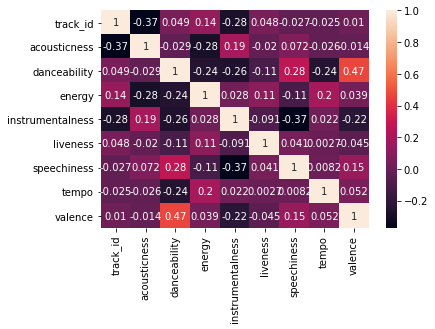

In [40]:
correlation = tracks_df.corr()
sns.heatmap(correlation,annot=True)
print(correlation)

In [38]:
correlation.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


## Normalizing the feature data

In [41]:
#standardisation
from sklearn.preprocessing import StandardScaler

track_train = tracks_df.drop(['track_id','genre_top'],axis=1)
scaler = StandardScaler()
scaled_track_train = scaler.fit_transform(track_train)

In [44]:
print(scaled_track_train)

[[-0.19121034  1.30442004  0.03831594 ...  0.37303429  1.15397908
   0.46228696]
 [-0.30603598  0.50188641  0.78817624 ...  2.44615517  0.00791367
  -0.69081137]
 [-1.20481276  1.68413943  0.31285194 ...  0.13513049 -0.77731688
   0.63107745]
 ...
 [-1.29470431  1.17682795  0.13265633 ...  0.85182206 -0.93541008
  -0.07941825]
 [-1.13869115 -0.02253433  0.57117905 ...  1.40951543  1.31301348
   0.47513794]
 [-0.90611434  1.10148973  0.56322452 ...  1.36030881 -1.43669053
   0.76217464]]


## Principal Component Analysis on our scaled data

Text(0.5, 0, 'Principal Component Analysis')

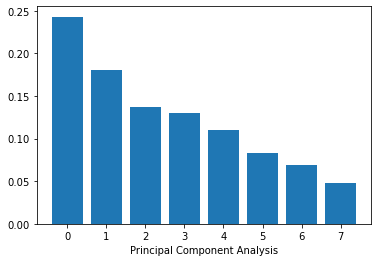

In [48]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(scaled_track_train)
var = pca.explained_variance_ratio_

fig, ax = plt.subplots()
ax.bar(range(len(var)), exp_variance)
ax.set_xlabel('Principal Component Analysis')


In [51]:
print("Explained variance {}".format(var))
print("No of features {}".format(len(var)))

Explained variance [0.24297674 0.18044316 0.13650309 0.12994089 0.11056248 0.08302245
 0.06923783 0.04731336]
No of features 8


## Further visualization of PCA

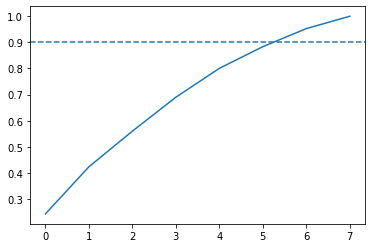

In [68]:
cum_var = np.cumsum(var)

fig, ax = plt.subplots()
ax.plot(range(len(var)), cum_var)
ax.axhline(y=0.9, linestyle='--')
n_components = 6

pca = PCA(n_components, random_state=10)
pca.fit(scaled_track_train)
pca_final= pca.transform(scaled_track_train)

## Train a decision tree to classify genre

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(pca_final,tracks_df['genre_top'].values,random_state=42)

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [88]:
y_pred

array(['Rock', 'Rock', 'Hip-Hop', ..., 'Rock', 'Hip-Hop', 'Hip-Hop'],
      dtype=object)

In [89]:
y_test

array(['Rock', 'Hip-Hop', 'Hip-Hop', ..., 'Rock', 'Hip-Hop', 'Hip-Hop'],
      dtype=object)

In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Hip-Hop       0.62      0.65      0.63       225
        Rock       0.92      0.91      0.91       976

    accuracy                           0.86      1201
   macro avg       0.77      0.78      0.77      1201
weighted avg       0.86      0.86      0.86      1201



In [92]:
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(y_test,y_pred)*100))    

Accuracy: 85.8451290591174
